## Lesson 4: Case Study - RFM Customer Segmentation

In [1]:
import numpy as np
import pandas as pd


In [3]:
df_raw = pd.read_excel('Data/Online_Retail.xlsx')
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df_raw.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
print(df_raw.duplicated().sum())
df = df_raw.drop_duplicates()
df.duplicated().sum()

5268


np.int64(0)

In [ ]:
#step 2: Data cleaning
df.dropna(subset="CustomerID", inplace=True)
df.isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9988\122177934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset="CustomerID", inplace=True)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [18]:
df = df[df['Quantity']>0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  object        
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.0+ MB


In [22]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,392732.000000,392732,392732.000000
mean,13.153718,2011-07-10 19:15:24.576301568,3.125596
min,1.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000
50%,6.000000,2011-07-31 12:02:00,1.950000
75%,12.000000,2011-10-20 12:53:00,3.750000
max,80995.000000,2011-12-09 12:50:00,8142.750000
std,181.588420,NaN,22.240725


In [25]:
df[df['UnitPrice']==0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom


In [28]:
df[df['InvoiceNo']==537197].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9287,537197,22843,BISCUIT TIN VINTAGE GREEN,2,2010-12-05 14:02:00,6.75,12647,Germany
9288,537197,22842,BISCUIT TIN VINTAGE RED,2,2010-12-05 14:02:00,6.75,12647,Germany
9289,537197,22961,JAM MAKING SET PRINTED,12,2010-12-05 14:02:00,1.45,12647,Germany
9290,537197,22962,JAM JAR WITH PINK LID,12,2010-12-05 14:02:00,0.85,12647,Germany
9291,537197,22963,JAM JAR WITH GREEN LID,12,2010-12-05 14:02:00,0.85,12647,Germany


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  object        
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.0+ MB


In [30]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
#step 3
df = df[df['InvoiceDate']<'2011-11-30']
now = df['InvoiceDate'].max() + pd.DateOffset(days=1) 
now 

Timestamp('2011-11-30 18:14:00')

In [42]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate':lambda x:(now-x.max()).days,
                                    'InvoiceNo': 'nunique',
                                    'TotalPrice': 'sum'})
rfm.head(5)

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346,316,1,77183.60
12347,30,6,4085.18
12348,66,4,1797.24
12349,9,1,1757.55
12350,301,1,334.40


In [46]:
rfm.rename(columns = {'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'TotalPrice':'MonetaryValue'}, inplace=True)
rfm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,316,1,77183.60
12347,30,6,4085.18
12348,66,4,1797.24
12349,9,1,1757.55
12350,301,1,334.40
...,...,...,...
18280,268,1,180.60
18281,171,1,80.82
18282,117,1,100.21


In [51]:
#step 4 
rfm['r_score'] = pd.qcut(x=rfm['Recency'], q=5, labels=[5,4,3,2,1])
rfm['m_score'] = pd.qcut(x=rfm['MonetaryValue'], q=5, labels=[1,2,3,4,5])
rfm.head()


,Recency,Frequency,MonetaryValue,r_score,m_score
CustomerID,,,,,
12346,316,1,77183.60,1,5
12347,30,6,4085.18,4,5
12348,66,4,1797.24,3,4
12349,9,1,1757.55,5,4
12350,301,1,334.40,1,2


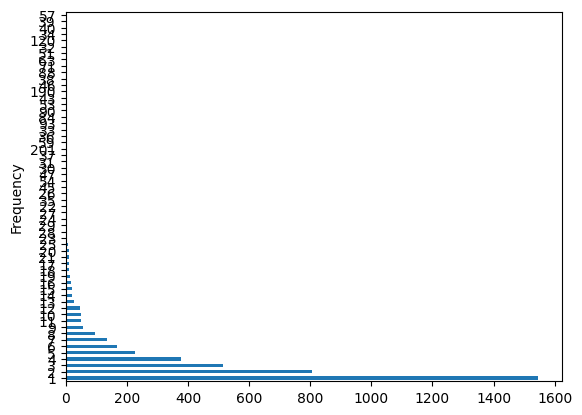

In [52]:
rfm['Frequency'].value_counts().plot(kind='barh');

In [53]:
rfm['f_score'] = pd.qcut(x=rfm['Frequency'].rank(method='first'), q=5, labels=[1,2,3,4,5])
rfm.head()

,Recency,Frequency,MonetaryValue,r_score,m_score,f_score
CustomerID,,,,,,
12346,316,1,77183.60,1,5,1
12347,30,6,4085.18,4,5,5
12348,66,4,1797.24,3,4,4
12349,9,1,1757.55,5,4,1
12350,301,1,334.40,1,2,1


In [55]:
rfm[rfm["Frequency"]==1]['f_score'].value_counts()

f_score
1    859
2    687
3      0
4      0
5      0
Name: count, dtype: int64

In [57]:
rfm[rfm["f_score"]==2]['Frequency'].value_counts()

Frequency
1    687
2    171
Name: count, dtype: int64

In [58]:
rfm['rf_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str)
rfm.head()

,Recency,Frequency,MonetaryValue,r_score,m_score,f_score,rf_score
CustomerID,,,,,,,
12346,316,1,77183.60,1,5,1,11
12347,30,6,4085.18,4,5,5,45
12348,66,4,1797.24,3,4,4,34
12349,9,1,1757.55,5,4,1,51
12350,301,1,334.40,1,2,1,11


In [59]:
segment_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At-Risk',
    r'[1-2]5': 'Cannot Lose Them',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}
rfm['segment'] = rfm['rf_score'].replace(segment_map, regex=True)
rfm.head()

,Recency,Frequency,MonetaryValue,r_score,m_score,f_score,rf_score,segment
CustomerID,,,,,,,,
12346,316,1,77183.60,1,5,1,11,Hibernating
12347,30,6,4085.18,4,5,5,45,Loyal Customers
12348,66,4,1797.24,3,4,4,34,Loyal Customers
12349,9,1,1757.55,5,4,1,51,New Customers
12350,301,1,334.40,1,2,1,11,Hibernating


In [60]:
rfm.groupby('segment').agg({"Recency":'mean',
                            'Frequency':'mean',
                            "MonetaryValue":['mean','count']})

Recency  Frequency MonetaryValue      
                           mean       mean          mean count
segment                                                       
About to Sleep        51.239884   1.118497    455.650408   346
At-Risk              153.623333   2.781667   1035.464485   600
Cannot Lose Them     128.945205   7.890411   2776.013699    73
Champions              6.661290  11.330645   6052.492726   620
Hibernating          217.174464   1.075049    475.260361  1026
Loyal Customers       32.867500   6.745000   3193.312364   800
Need Attention        50.413613   2.319372    983.306131   191
New Customers          7.093750   1.000000    306.231250    64
Potential Loyalists   15.638075   1.884937    646.003556   478
Promising             22.568421   1.000000    379.225789    95

<Axes: xlabel='segment'>

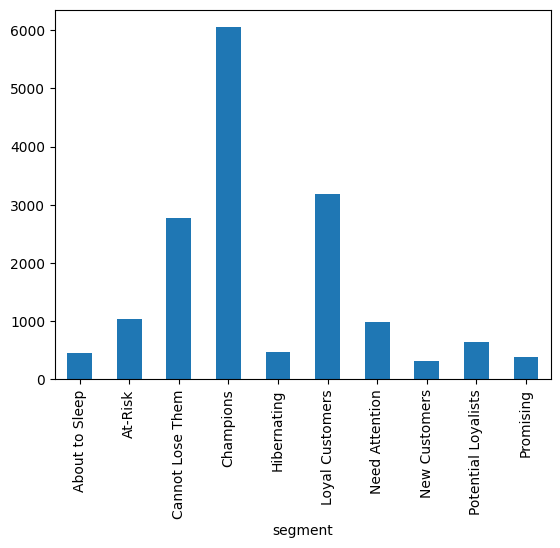

In [66]:
rfm.groupby('segment')['MonetaryValue'].mean().plot(kind='bar')

In [70]:
rfm[rfm['segment'] =='Champions']['MonetaryValue'].sum()/rfm['MonetaryValue'].sum()

np.float64(0.45056020568447325)

In [71]:
620/len(rfm)

0.14442115071045888

In [72]:
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
rfm.head()

,Recency,Frequency,MonetaryValue,r_score,m_score,f_score,rf_score,segment,rfm_score
CustomerID,,,,,,,,,
12346,316,1,77183.60,1,5,1,11,Hibernating,115
12347,30,6,4085.18,4,5,5,45,Loyal Customers,455
12348,66,4,1797.24,3,4,4,34,Loyal Customers,344
12349,9,1,1757.55,5,4,1,51,New Customers,514
12350,301,1,334.40,1,2,1,11,Hibernating,112


In [73]:
champions = rfm[rfm['segment']=='Champions']
champions.head()

,Recency,Frequency,MonetaryValue,r_score,m_score,f_score,rf_score,segment,rfm_score
CustomerID,,,,,,,,,
12380,12,4,2724.81,5,5,4,54,Champions,545
12388,6,6,2780.66,5,5,5,55,Champions,555
12395,10,12,3018.63,5,5,5,55,Champions,555
12421,6,4,807.04,5,3,4,54,Champions,543
12437,12,16,4493.10,5,5,5,55,Champions,555


In [74]:
champions['rfm_score'].value_counts()

rfm_score
555    308
544    104
554     84
543     64
545     38
542     12
553      7
541      1
552      1
551      1
Name: count, dtype: int64